## **Image Classification: Plant Leaves Dataset**


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc2


##Import the Dataset
This dataset contain 15 classes, with a total of 20655 images between the classes. The images show individual leaves each class being either from a different plant or from the same plant but in a different state of health or carrying a different disease. The images are displayed in a 256x256 resolution.

In [0]:
EPOCHS = 32
INIT_LR = 1e-3
BS = 50
default_image_size = tuple((256, 256))
directory_root = '/content/drive/My Drive/input/plantdisease/'
width=256
height=256
depth=3

In [4]:
import os.path
from os import listdir

totalImages = 0

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    
    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for plant_disease_folder in plant_disease_folder_list:
            img_folder_path = (f"/content/drive/My Drive/input/plantdisease/PlantDisease/{plant_disease_folder}")
            dirListing = os.listdir(img_folder_path)
            print(f"[INFO] Processing {plant_disease_folder} ...", len(dirListing))
            totalImages += len(dirListing)

    print("[INFO] Total Images: ", totalImages)
    print("[INFO] Image loading completed") 
    print(plant_disease_folder_list)
except Exception as e:
    print(f"Error : {e}")
    

[INFO] Loading images ...
[INFO] Processing Tomato_Septoria_leaf_spot ... 1775
[INFO] Processing Potato___Early_blight ... 1000
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ... 1676
[INFO] Processing Pepper__bell___healthy ... 1478
[INFO] Total Images:  5929
[INFO] Image loading completed
['Tomato_Septoria_leaf_spot', 'Potato___Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy']


In [5]:
import cv2

image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    
    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for plant_disease_folder in plant_disease_folder_list:
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            img_folder_path = (f"/content/drive/My Drive/input/plantdisease/PlantDisease/{plant_disease_folder}")
            dirListing = os.listdir(img_folder_path)
            print(f"[INFO] Processing {plant_disease_folder} ...")
            for image in plant_disease_image_list[:1000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image = cv2.imread(image_directory)
                    image = cv2.resize(image, default_image_size)
                    image_list.append(image)
                    label_list.append(plant_disease_folder)
        print("[INFO] Image loading completed") 
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Image loading completed


In [0]:
from sklearn import preprocessing
import pickle

le = preprocessing.LabelEncoder()
image_labels = le.fit_transform(label_list)
pickle.dump(le,open('label_transform.pkl', 'wb'))
n_classes = len(le.classes_)

In [7]:
from sklearn.model_selection import train_test_split

totalImages = len(image_list)

print("[INFO] Converting image_list to numpy array")
np_image_list = np.asarray(image_list, dtype=np.float32)

print("[INFO] Spliting data into train and test")
train_images, test_images, train_labels, test_labels = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Converting image_list to numpy array
[INFO] Spliting data into train and test


##Explore the Data

The following shows that there are {{totalImages}} images in the training set, with each image represented as 256x256 pixels:

In [8]:
train_images.shape

(3200, 256, 256, 3)

Likewise, there are (x) labels in the training set:

In [9]:
len(train_labels)

3200

Each label is an integer between 0 and 13:

In [10]:
train_labels

array([0, 2, 3, ..., 2, 0, 0])

There are (y) images in the test set. Again, each image is represented as 256x256 pixels:

In [11]:
test_images.shape

(800, 256, 256, 3)

And the test set contains (y) image labels:

In [12]:
len(test_labels)

800

##Preprocessing the Data

The data must be preprocessed before training the network. If you inspect an image from the  dataset, you will see that the pixel values fall between the range of 0 and 255:

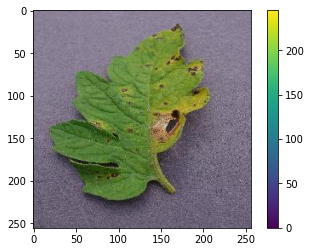

In [13]:
x = plt.imread("/content/drive/My Drive/input/plantdisease/PlantDisease/Tomato_Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG")
plt.imshow(x)
plt.colorbar()
plt.show()


In order to feed the images into a neural network model the values must be scaked between the ranges of 0 to 1. This can be done by dividing the values by 255. It is important that the training and test sets are preprocessed in the same way:

In [0]:
train_images = train_images / 255
test_images = test_images / 255

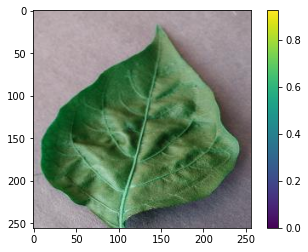

In [15]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

To verify that the images are labelled correctly and are ready for training by the nural network I will display the first 25 images from the training set and display the class names below each one.

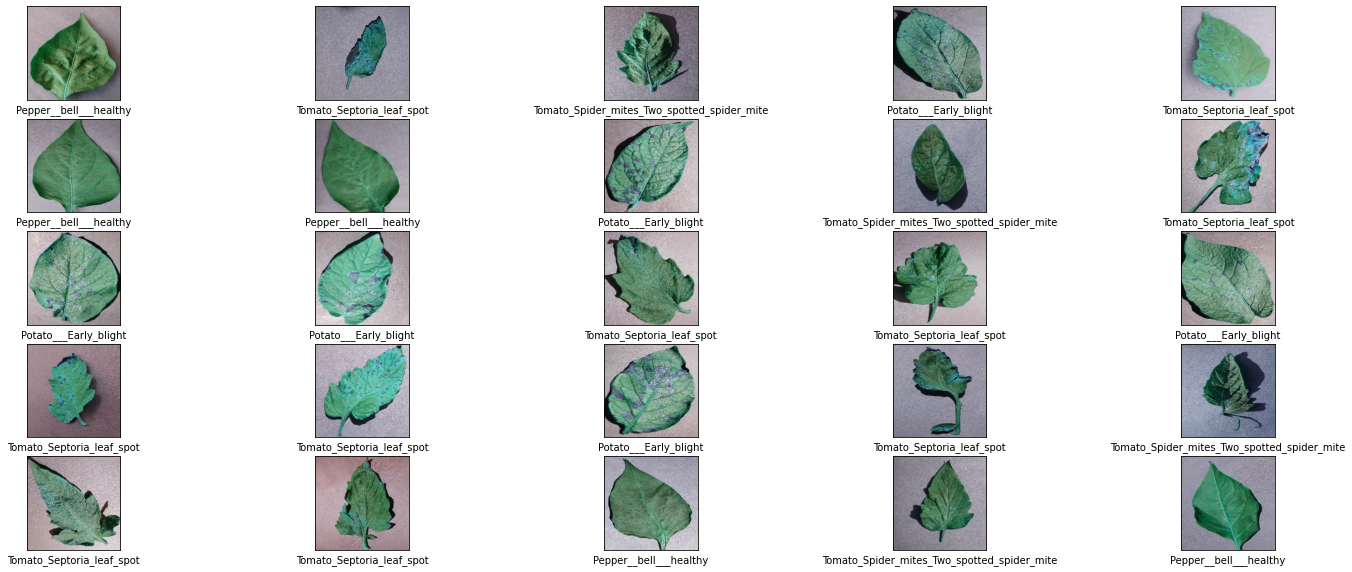

In [16]:
plt.figure(figsize=(25,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(le.classes_[train_labels[i]])
plt.show()

##Build the Model

In [17]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.python.keras import backend as K

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

## Train the Model

In [19]:
from tensorflow.keras.optimizers import Adam

#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])# train the network
print("[INFO] training network...")

[INFO] training network...


In [0]:
history = model.fit(
    aug.flow(train_images, train_labels, batch_size=BS),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/32
64/64 [==============================] - 675s 11s/step - loss: 0.9453 - accuracy: 0.7978 - val_loss: 1.4733 - val_accuracy: 0.2663
Epoch 2/32
64/64 [==============================] - 673s 11s/step - loss: 0.8838 - accuracy: 0.8553 - val_loss: 1.4504 - val_accuracy: 0.2837
Epoch 3/32
64/64 [==============================] - 700s 11s/step - loss: 0.8524 - accuracy: 0.8878 - val_loss: 1.4774 - val_accuracy: 0.2663
Epoch 4/32
64/64 [==============================] - 666s 10s/step - loss: 0.8325 - accuracy: 0.9091 - val_loss: 1.4770 - val_accuracy: 0.2663
Epoch 5/32
64/64 [==============================] - 671s 10s/step - loss: 0.8179 - accuracy: 0.9237 - val_loss: 1.4738 - val_accuracy: 0.2700
Epoch 6/32
15/64 [======>.......................] - ETA: 7:41 - loss: 0.7879 - accuracy: 0.9600

## Evaluate Accuracy

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {scores[1]*100}")

## Make Predictions

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

In [0]:
np.argmax(predictions[0])

In [0]:
test_labels[0]

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(plant_disease_folder_list[predicted_label],
                                100*np.max(predictions_array),
                                plant_disease_folder_list[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify Predictions


In [0]:
i = 0
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [0]:
i = 1
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [0]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(8*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Save the Model

In [0]:
import tensorflow as tf

# save the model to disk
print("[INFO] Saving model...")
!mkdir -p saved_model
model.save('/content/drive/My Drive/my_model') 

In [0]:
!ls saved_model
!ls saved_model/my_model
